In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [7]:
df['Type'].value_counts()

2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: Type, dtype: int64

In [9]:
target=df[['Type']]
target

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209,7.0
210,7.0
211,7.0
212,7.0


In [11]:
features=df.drop(columns='Type')
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


# 1. Exploratory Data Analysis (EDA):

In [14]:
features.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [16]:
import scipy.stats as stats

In [17]:
def find_outliers_with_extremes(df,column):
    Q1 = features[column].quantile(0.25)   # find Q1
    Q3 = features[column].quantile(0.75)   #Find Q2
    IQR = Q3 - Q1                    # Find IQR
    lower_bound = Q1 - 1.5 * IQR     # calcualte the lower bound
    upper_bound = Q3 + 1.5 * IQR     # calcualte the upper bound
    print(f"Lower_bond: {lower_bound}")
    print(f"Upper_bond: {upper_bound}") 
    
    outlier_rows = features[(features[column] < lower_bound) | (features[column] > upper_bound)]
    # find the rows which has outlierd
    return outlier_rows,lower_bound,upper_bound

In [18]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(features, 'Al')
outliers_df  

Lower_bond: 0.53
Upper_bond: 2.29


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09


In [19]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(features, 'Si')
outliers_df

Lower_bond: 71.06875
Upper_bond: 74.29875000000001


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00


In [20]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(features, 'K')
outliers_df

Lower_bond: -0.6087499999999999
Upper_bond: 1.34125


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.0
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.0
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.0
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.0
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.0
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.0
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0


In [21]:
df_no_outliers= features[(features['K'] >= lower_bound) & (features['K'] <= upper_bound)]  
# only column K has some extreme outliers so i remove it,rest of all columns outliers are almost near to lower bound and upper bound so i retain them
df_no_outliers.shape

(207, 9)

In [22]:
features_new=df_no_outliers

In [30]:
features_new

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


# 2 Data Visualization:

array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>]], dtype=object)

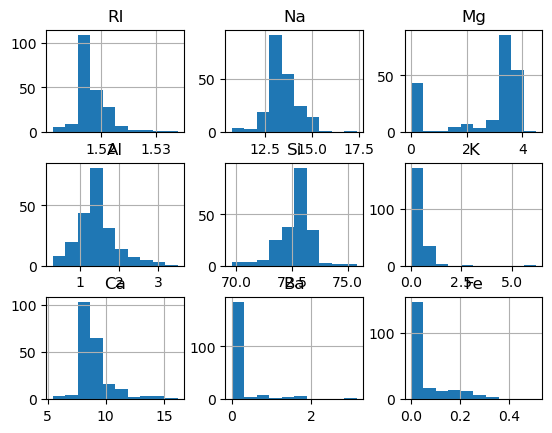

In [33]:
features.hist()

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

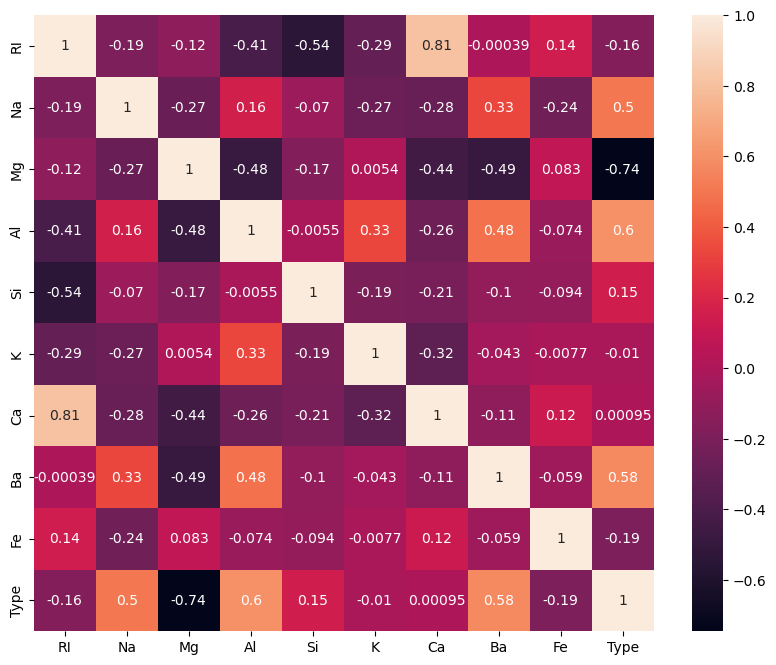

In [35]:
corr = df.corr()    # Compute the correlation matrix

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True)

plt.show()

# 3.Data Preprocessing


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
std_sca=StandardScaler()


In [83]:
std_sca.fit_transform(features_new)

array([[ 0.84944279,  0.28810459,  1.24476899, ..., -0.2098796 ,
        -0.33422771, -0.59978232],
       [-0.28949119,  0.59500892,  0.61489701, ..., -0.88549608,
        -0.33422771, -0.59978232],
       [-0.76851342,  0.15306668,  0.57951094, ..., -0.92221437,
        -0.33422771, -0.59978232],
       ...,
       [ 0.72884978,  1.17198906, -1.93289977, ..., -0.43753298,
         3.5041898 , -0.59978232],
       [-0.65796983,  1.19654141, -1.93289977, ..., -0.40815835,
         3.34035491, -0.59978232],
       [-0.45698148,  1.01239881, -1.93289977, ..., -0.30534715,
         3.57440476, -0.59978232]])

In [44]:
df1=pd.DataFrame(std_sca.fit_transform(features_new),columns=features.columns)

In [46]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.849443,0.288105,1.244769,-0.690395,-1.271110,-1.339482,-0.209880,-0.334228,-0.599782
1,-0.289491,0.595009,0.614897,-0.117955,0.075170,0.266345,-0.885496,-0.334228,-0.599782
2,-0.768513,0.153067,0.579511,0.278349,0.443626,-0.077761,-0.922214,-0.334228,-0.599782
3,-0.272742,-0.239771,0.678592,-0.272074,-0.094887,0.610450,-0.599093,-0.334228,-0.599782
4,-0.353138,-0.166114,0.629051,-0.382158,0.571168,0.533983,-0.709248,-0.334228,-0.599782
...,...,...,...,...,...,...,...,...,...
202,-0.751764,0.901913,-1.932900,3.228614,-0.094887,-1.263014,0.105898,2.146701,-0.599782
203,-0.544076,1.859455,-1.932900,1.269110,0.542825,-1.568885,-0.466908,3.387165,-0.599782
204,0.728850,1.171989,-1.932900,1.335160,1.052995,-1.568885,-0.437533,3.504190,-0.599782
205,-0.657970,1.196541,-1.932900,1.159025,1.322251,-1.568885,-0.408158,3.340355,-0.599782


In [48]:
df2=pd.merge(df1,target,left_index=True,right_index=True)

In [50]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.849443,0.288105,1.244769,-0.690395,-1.271110,-1.339482,-0.209880,-0.334228,-0.599782,1.0
1,-0.289491,0.595009,0.614897,-0.117955,0.075170,0.266345,-0.885496,-0.334228,-0.599782,1.0
2,-0.768513,0.153067,0.579511,0.278349,0.443626,-0.077761,-0.922214,-0.334228,-0.599782,1.0
3,-0.272742,-0.239771,0.678592,-0.272074,-0.094887,0.610450,-0.599093,-0.334228,-0.599782,1.0
4,-0.353138,-0.166114,0.629051,-0.382158,0.571168,0.533983,-0.709248,-0.334228,-0.599782,1.0
...,...,...,...,...,...,...,...,...,...,...
202,-0.751764,0.901913,-1.932900,3.228614,-0.094887,-1.263014,0.105898,2.146701,-0.599782,7.0
203,-0.544076,1.859455,-1.932900,1.269110,0.542825,-1.568885,-0.466908,3.387165,-0.599782,7.0
204,0.728850,1.171989,-1.932900,1.335160,1.052995,-1.568885,-0.437533,3.504190,-0.599782,7.0
205,-0.657970,1.196541,-1.932900,1.159025,1.322251,-1.568885,-0.408158,3.340355,-0.599782,7.0


In [52]:
features_new1=df2.drop(columns='Type')
features_new1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.849443,0.288105,1.244769,-0.690395,-1.271110,-1.339482,-0.209880,-0.334228,-0.599782
1,-0.289491,0.595009,0.614897,-0.117955,0.075170,0.266345,-0.885496,-0.334228,-0.599782
2,-0.768513,0.153067,0.579511,0.278349,0.443626,-0.077761,-0.922214,-0.334228,-0.599782
3,-0.272742,-0.239771,0.678592,-0.272074,-0.094887,0.610450,-0.599093,-0.334228,-0.599782
4,-0.353138,-0.166114,0.629051,-0.382158,0.571168,0.533983,-0.709248,-0.334228,-0.599782
...,...,...,...,...,...,...,...,...,...
202,-0.751764,0.901913,-1.932900,3.228614,-0.094887,-1.263014,0.105898,2.146701,-0.599782
203,-0.544076,1.859455,-1.932900,1.269110,0.542825,-1.568885,-0.466908,3.387165,-0.599782
204,0.728850,1.171989,-1.932900,1.335160,1.052995,-1.568885,-0.437533,3.504190,-0.599782
205,-0.657970,1.196541,-1.932900,1.159025,1.322251,-1.568885,-0.408158,3.340355,-0.599782


In [54]:
target_new=df2[['Type']]
target_new

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
202,7.0
203,7.0
204,7.0
205,7.0


# 4. Random Forest Model Implementation


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection  import  train_test_split




In [58]:
x_train,x_test,y_train,y_test=train_test_split(features_new1,target_new,train_size=0.75,random_state=100)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(155, 9)
(52, 9)
(155, 1)
(52, 1)


In [60]:
random=RandomForestClassifier(n_estimators=50,bootstrap=True,max_samples=1.0,max_features='sqrt')

In [65]:
random.fit(x_train,y_train)

C:\Users\Prerana\AppData\Local\Temp\ipykernel_50104\2148899976.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train,y_train)


RandomForestClassifier(max_features='sqrt', max_samples=1.0, n_estimators=50)

In [67]:
y_predict=random.predict(x_test)
y_predict

array([1., 7., 1., 2., 7., 1., 1., 1., 1., 1., 2., 6., 2., 1., 2., 1., 1.,
       2., 1., 2., 7., 2., 2., 2., 2., 5., 1., 1., 1., 1., 7., 1., 2., 2.,
       1., 2., 2., 7., 7., 2., 2., 1., 2., 2., 1., 6., 1., 2., 3., 7., 1.,
       2.])

In [69]:
accuracy_score(y_test,y_predict)

0.7115384615384616

In [71]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         1.0       0.62      1.00      0.76        13
         2.0       0.80      0.76      0.78        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.17      0.29         6
         6.0       0.50      0.33      0.40         3
         7.0       0.86      1.00      0.92         6

    accuracy                           0.71        52
   macro avg       0.63      0.54      0.53        52
weighted avg       0.72      0.71      0.67        52



In [73]:
df['Type'].value_counts()

2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: Type, dtype: int64

# 5.Bagging and Boosting Methods


In [93]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [111]:
bag_class=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,bootstrap=True,max_samples=1,max_features=1)

In [113]:
bag_class.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=1,
                  max_samples=1, n_estimators=50)

In [115]:
y_pred=bag_class.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [117]:
accuracy_score(y_test,y_pred)

0.25

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.25      1.00      0.40        13
         2.0       0.00      0.00      0.00        21
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         6

    accuracy                           0.25        52
   macro avg       0.04      0.17      0.07        52
weighted avg       0.06      0.25      0.10        52



In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
grad_boost=GradientBoostingClassifier(learning_rate=0.5,max_depth=2,max_features=0.9,subsample=0.9,n_estimators=100)

In [123]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=0.9,
                           subsample=0.9)

In [125]:
y_pred1=grad_boost.predict(x_test)

In [127]:
accuracy_score(y_test,y_pred1)

0.7307692307692307

In [129]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         1.0       0.65      0.85      0.73        13
         2.0       0.77      0.81      0.79        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.33      0.50         6
         6.0       0.67      0.67      0.67         3
         7.0       1.00      1.00      1.00         6

    accuracy                           0.73        52
   macro avg       0.68      0.61      0.62        52
weighted avg       0.74      0.73      0.71        52



In [131]:
# the given dataset works better with random forest and gradient boost compared to bagging

1.Explain Bagging and Boosting methods. How is it different from each other.

2. Explain how to handle imbalance in the data.

In [137]:
#1. Bagging is an ensemble learning technique that reduces variance by training multiple models independently on different random subsets of the data and then combining their predictions.
#  it helps with the problem of overfit
# in bagging model training is independent

In [139]:
# 2.Boosting is an ensemble learning technique that reduces bias by training models sequentially, with each model correcting the errors of the previous one.
# it helps with problem of underfit
# in boosting model model training is sequential

In [141]:
# 2. Imbalance data occurs when there is unequal distribution of class in target
 # handling :
   #i) by oversampling the minority class
   #ii)by undersampling the majority class
   #iii)Use Ensemble Techniques like Balanced Random Forest or XGBoost with class weights.